In [2]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats, shapiro, mannwhitneyu, probplot

In [3]:
data_sheet = pd.read_excel('/mnt/c/Users/olutu/Downloads/record_of_interactions.xlsx', sheet_name='Sheet2')

In [4]:
data_sheet.head(3)

,N,participants_id,condition,baseline_robot_sentiment,story_related_emotion,postsession_robot_sentiment,story_liked,enjoyed_robot_conversation,activity_liked,future_robot_use,intended_use_case,Story Recall
0,1,MONPM16,AI,Happy,Happy,Happy,Yes,Yes,Yes,Yes,To clean my room,2.0
1,2,MONPM24,AI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,MONPM4,AI,NaN,Happy,Okay,Yes,Yes,Yes,Yes,Storytelling. Conversation.,1.0


In [5]:
likert_map = {
    "Very happy": 4,
    "Happy": 3,
    "Okay": 2,
    "Sad": 1,
    "Very sad": 0
}

In [6]:
data_sheet["baseline_robot_sentiment"] = data_sheet["baseline_robot_sentiment"].map(likert_map)
data_sheet["postsession_robot_sentiment"] = data_sheet["postsession_robot_sentiment"].map(likert_map)
data_sheet['story_related_emotion'] = data_sheet['story_related_emotion'].map(likert_map)


In [7]:
data_sheet.head()

,N,participants_id,condition,baseline_robot_sentiment,story_related_emotion,postsession_robot_sentiment,story_liked,enjoyed_robot_conversation,activity_liked,future_robot_use,intended_use_case,Story Recall
0,1,MONPM16,AI,3.0,3.0,3.0,Yes,Yes,Yes,Yes,To clean my room,2.0
1,2,MONPM24,AI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,MONPM4,AI,NaN,3.0,2.0,Yes,Yes,Yes,Yes,Storytelling. Conversation.,1.0
3,4,MONPM14,AI,NaN,2.0,3.0,Yes,Yes,Yes,No,I don't really understand what it's saying,0.0
4,5,TUEAM31,AI,NaN,2.0,2.0,No,No,No,No,NaN,NaN


In [8]:
#Baseline robot sentiment
baseline_robot_sentiment_ai = data_sheet[data_sheet['condition'] == 'AI']['baseline_robot_sentiment'].dropna().astype(int)
baseline_robot_sentiment_ctrl = data_sheet[data_sheet['condition'] == 'Control']['baseline_robot_sentiment'].dropna().astype(int)

In [9]:
# Story recall
ai_group_recall = data_sheet[data_sheet['condition'] == 'AI']['Story Recall'].dropna().astype(int)
control_group_recall = data_sheet[data_sheet['condition'] == 'Control']['Story Recall'].dropna().astype(int)

# Story-related emotion
story_related_emotion_ai = data_sheet[data_sheet['condition'] == 'AI']['story_related_emotion'].dropna().astype(int)
story_related_emotion_c = data_sheet[data_sheet['condition'] == 'Control']['story_related_emotion'].dropna().astype(int)

#Postsession robot sentiment
postRS_ai = data_sheet[data_sheet['condition'] == 'AI']['postsession_robot_sentiment'].dropna().astype(int)
postRS_ctrl = data_sheet[data_sheet['condition'] == 'Control']['postsession_robot_sentiment'].dropna().astype(int)

Shapiro-Wilk Test

Test story_recall for normal distribution

In [10]:
shapiro_BRS_AI, BRS_ai = shapiro(baseline_robot_sentiment_ai)
shapiro_BRS_C, BRS_ctrl = shapiro(baseline_robot_sentiment_ctrl)

In [11]:
x = len(baseline_robot_sentiment_ai)
y = len(baseline_robot_sentiment_ctrl)

print("Number of respondents in ai group (baseline robot sentiment):", x)
print("Number of respondents in control group (baseline robot sentiment):", y)
print("Number of respondents that reported a baseline robot sentiment: ", x + y)
# For AI Group
print("AI group: W.stat = %.3f, p = {%.5f}"% (shapiro_BRS_AI, BRS_ai))
print("Control group: W.stat = %.3f, p = {%.5f}"%(shapiro_BRS_C, BRS_ctrl))

Number of respondents in ai group (baseline robot sentiment): 15
Number of respondents in control group (baseline robot sentiment): 24
Number of respondents that reported a baseline robot sentiment:  39
AI group: W.stat = 0.771, p = {0.00162}
Control group: W.stat = 0.818, p = {0.00059}


In [12]:
shapiro_ai_recall, p_ai = shapiro(ai_group_recall)
shapiro_control_recall, p_ctrl = shapiro(control_group_recall)

In [13]:
x = len(ai_group_recall)
y = len(control_group_recall)

print("Number of participants in ai_recall group:", x)
print("Number of participants in control_recall group:", y)
print("Number of persons that attempted to recall the narrative: ", x +y)
# For AI Group
print("AI group: W.stat = %.3f, p = {%.5f}"% (shapiro_ai_recall, p_ai))
print("Control group: W.stat = %.3f, p = {%.5f}"%(shapiro_control_recall, p_ctrl))

Number of participants in ai_recall group: 24
Number of participants in control_recall group: 22
Number of persons that attempted to recall the narrative:  46
AI group: W.stat = 0.727, p = {0.00002}
Control group: W.stat = 0.738, p = {0.00006}


In [14]:
shapiro_PostRS_ai, p_PRS_ai=shapiro(postRS_ai)
shapiro_PostRS_ctrl, p_PRS_ctrl=shapiro(postRS_ctrl)

In [15]:
x = len(postRS_ai)
y = len(postRS_ctrl)

print("Number of participants reported post-session robot sentiment (AI):", x)
print("Number of participants report post-session robot sentiment (Control):", y)
print("Number of persons reported the post-session robot sentiment: ", x+y)
# For AI Group
print("AI group: W.stat = %.3f, p = {%.5f}"% (shapiro_PostRS_ai, p_PRS_ai))
# For the control group
print("Control group: W.stat = %.3f, p = {%.5f}"%(shapiro_PostRS_ctrl, p_PRS_ctrl))

Number of participants reported post-session robot sentiment (AI): 33
Number of participants report post-session robot sentiment (Control): 25
Number of persons reported the post-session robot sentiment:  58
AI group: W.stat = 0.800, p = {0.00003}
Control group: W.stat = 0.805, p = {0.00028}


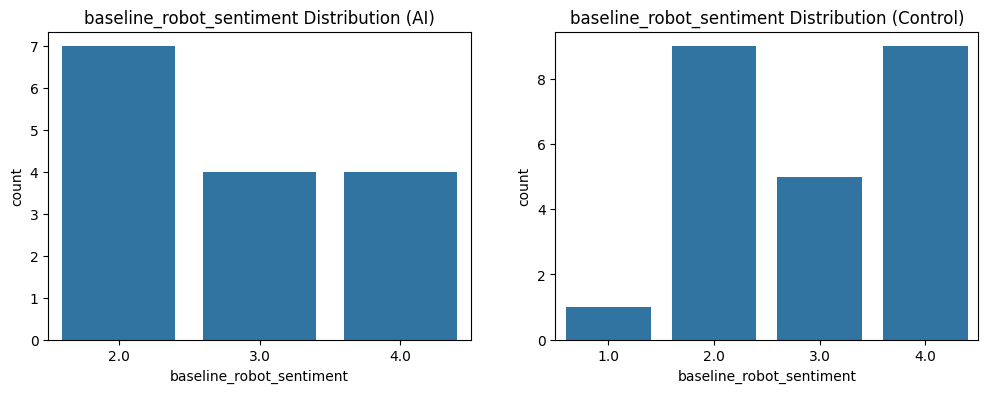

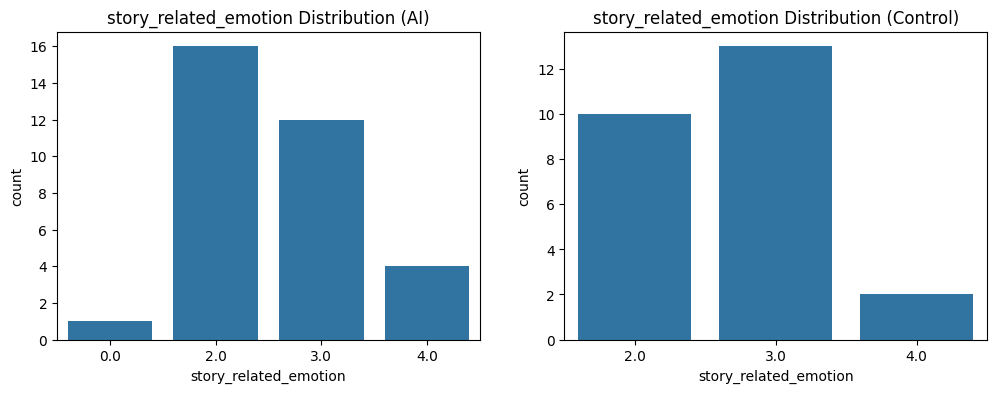

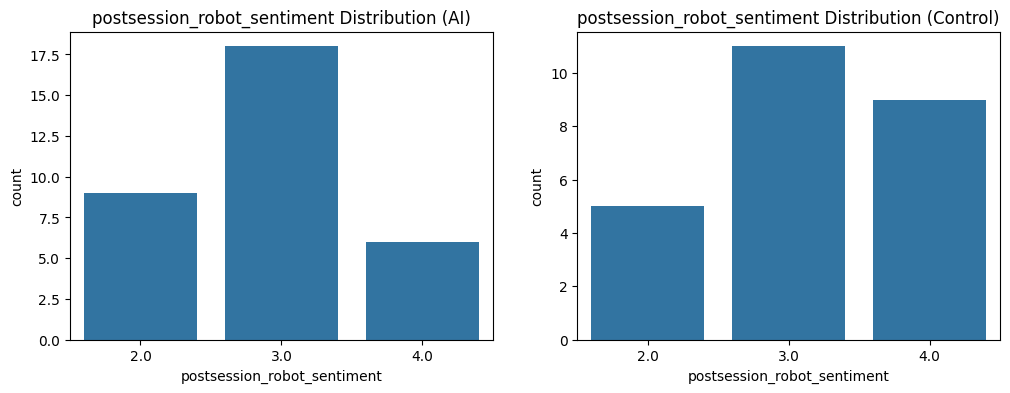

In [16]:
features = ['baseline_robot_sentiment', 'story_related_emotion', 'postsession_robot_sentiment']
group_col = 'condition'

for feature in features:
    plt.figure(figsize=(12, 4))

    # Histogram/barplot for AI group
    plt.subplot(1, 2, 1)
    sns.countplot(x=feature, data=data_sheet[data_sheet[group_col]=='AI'])
    plt.title(f"{feature} Distribution (AI)")

    # Histogram/barplot for Control group
    plt.subplot(1, 2, 2)
    sns.countplot(x=feature, data=data_sheet[data_sheet[group_col]=='Control'])
    plt.title(f"{feature} Distribution (Control)")
    plt.show()


TEST FOR THE DIFFERENCE BETWEEN THE TWO GROUPS (AI AND CONTROL)

In [17]:
# The Mann-Test for story related emotion
u_statistic, p_value = mannwhitneyu(story_related_emotion_ai, story_related_emotion_c, alternative='two-sided')

print("Mann-Whitney U-value (Story related emotion):", u_statistic)
print("p-value (Story related emotion):", p_value)

Mann-Whitney U-value (Story related emotion): 374.0
p-value (Story related emotion): 0.5122634026791186


In [18]:
# The Mann-Test for baseline robot sentiment
u_statistic, p_value = mannwhitneyu(baseline_robot_sentiment_ai, baseline_robot_sentiment_ctrl, alternative='two-sided')

print("Mann-Whitney U-value (Baseline robot sentiment):", u_statistic)
print("p-value (Baseline robot sentiment):", p_value)


Mann-Whitney U-value (Baseline robot sentiment): 166.5
p-value (Baseline robot sentiment): 0.6894870030832928


In [19]:
# The Mann-Test for post-session robot sentiment
u_statistic, p_value = mannwhitneyu(postRS_ai, postRS_ctrl, alternative='two-sided')

print("Mann-Whitney U-value (Post session robot sentiment):", u_statistic)
print("p-value (post session robot sentiment):", p_value)

Mann-Whitney U-value (Post session robot sentiment): 334.5
p-value (post session robot sentiment): 0.1852918795506875


In [20]:
# List of four columns with yes/no answers
engagement_cols = [
    'story_liked',
    'enjoyed_robot_conversation',
    'activity_liked',
    'future_robot_use'
]

In [ ]:
def yes_count2(row):
    return sum(str(row[col]).strip().lower().startswith('yes') for col in engagement_cols)

In [24]:
def yes_count(row):
    count = 0
    for col in engagement_cols:
        value = str(row[col]).strip().lower()
        if value.startswith('yes'):
            count += 1
    return count

In [25]:
data_sheet['engagement_score'] = data_sheet.apply(yes_count, axis=1)

In [26]:
data_sheet.columns

Index(['N', 'participants_id', 'condition', 'baseline_robot_sentiment',
       'story_related_emotion', 'postsession_robot_sentiment', 'story_liked',
       'enjoyed_robot_conversation', 'activity_liked', 'future_robot_use',
       'intended_use_case', 'Story Recall', 'engagement_score'],
      dtype='object')

In [27]:
data_sheet[['condition', 'engagement_score']].head()

,condition,engagement_score
0,AI,4
1,AI,0
2,AI,4
3,AI,3
4,AI,0


In [37]:
# Separate scores by condition
engagement_ai = data_sheet[data_sheet['condition'] == 'AI']['engagement_score'].dropna()
engagement_control = data_sheet[data_sheet['condition'] == 'Control']['engagement_score'].dropna()

In [38]:
engagement_ai.head()

0    4
1    0
2    4
3    3
4    0
Name: engagement_score, dtype: int64

In [39]:
engagement_control.head()

22    4
23    4
24    4
25    0
26    4
Name: engagement_score, dtype: int64

In [40]:
print("Number of participants in Control group (engagement score):", engagement_control.size)
print("Number of participants in AI group (engagement score):", engagement_ai.size)

Number of participants in Control group (engagement score): 30
Number of participants in AI group (engagement score): 35


In [41]:
u_statistic, p_value = mannwhitneyu(engagement_ai, engagement_control, alternative='two-sided')

In [42]:
print("Mann-Whitney U-value (engagement):", u_statistic)
print("p-value (engagement):", p_value)

Mann-Whitney U-value (engagement): 511.0
p-value (engagement): 0.8176616018230672


A p-value >> 0.05 s there indicates no significant difference in overall engagement between the AI and Control groups based on the Mann-Whitney U test.